### <center> Random Forest Algorithm 

### Importing Necessary Libraries

In [1]:
import rasterio
import rasterio.features
import rasterio.warp
import geojson
import numpy as np
import os
from os.path import isfile, join
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix
import seaborn as sns

### Reading data

In [2]:
df_new=  pd.read_csv('Added_Features.csv')

## Checking column names

In [3]:
df_new.columns


Index(['Unnamed: 0', 'Lat', 'Lon', 'Class', 'Band_2_mean', 'Band_2_max',
       'Band_2_min', 'Band_3_mean', 'Band_3_max', 'Band_3_min', 'Band_4_mean',
       'Band_4_max', 'Band_4_min', 'Band_8_mean', 'Band_8_max', 'Band_8_min',
       'Band_2_range', 'Band_3_range', 'Band_4_range', 'Band_8_range',
       'NDVI_mean', 'NDVI_max', 'NDVI_min', 'NDVI_range', 'NDWI_mean',
       'NDWI_max', 'NDWI_min', 'NDWI_range', 'EVI_mean', 'EVI_max', 'EVI_min',
       'EVI_range', 'SAVI_mean', 'SAVI_max', 'SAVI_min', 'SAVI_range'],
      dtype='object')

### Creating the predicting features

In [4]:
X = df_new[['Band_2_mean', 'Band_2_max',
       'Band_2_min', 'Band_3_mean', 'Band_3_max', 'Band_3_min', 'Band_4_mean',
       'Band_4_max', 'Band_4_min', 'Band_8_mean', 'Band_8_max', 'Band_8_min',
       'Band_2_range', 'Band_3_range', 'Band_4_range', 'Band_8_range',
       'NDVI_mean',  'NDWI_mean','EVI_mean','SAVI_mean', ]]
X.head(5)

,Band_2_mean,Band_2_max,Band_2_min,Band_3_mean,Band_3_max,Band_3_min,Band_4_mean,Band_4_max,Band_4_min,Band_8_mean,Band_8_max,Band_8_min,Band_2_range,Band_3_range,Band_4_range,Band_8_range,NDVI_mean,NDWI_mean,EVI_mean,SAVI_mean
0,1073.490723,2182,589,1120.595703,2297,407,999.392822,2343,246,3031.135742,4526,440,1593,1890,2097,4086,0.504088,-0.460179,1.000000,1.000000
1,989.156250,1781,856,946.531738,1884,756,852.455322,2067,601,2005.445068,2998,1671,925,1128,1466,1327,0.403439,-0.358713,0.000000,1.000000
2,1210.727295,1742,891,1073.504150,1684,588,938.572754,1710,346,2361.495605,4020,614,851,1096,1364,3406,0.431180,-0.374961,0.000000,1.000000
3,1443.287598,2569,960,1518.321777,2988,912,1845.681396,3845,803,2468.726318,4405,1543,1609,2076,3042,2862,0.144410,-0.238373,0.572829,0.360900
4,1063.884766,1520,865,1046.255615,1684,792,1129.320312,2270,601,2318.951660,3285,1808,655,892,1669,1477,0.344993,-0.378192,1.000000,0.862109


### Creating the Target variable

In [5]:
y = df_new.iloc[:,3]
y.unique()


array(['HerbaceousVegetation', 'Pasture', 'PermanentCrop', 'SeaLake',
       'Residential', 'Forest', 'River', 'Industrial', 'Highway',
       'AnnualCrop'], dtype=object)

### Training and test set split

In [6]:
from sklearn.model_selection import train_test_split

# Splitting the data with 80% for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)


(21600, 20) (21600,) (5400, 20) (5400,)


### Model Run

In [7]:
%%time
from sklearn.ensemble import RandomForestClassifier

dt_RF = RandomForestClassifier()
dt_RF.fit(X_train, y_train)
ypred_dt = dt_RF.predict(X_test)
ypred_dt == y_test

CPU times: user 8.88 s, sys: 42.6 ms, total: 8.92 s
Wall time: 8.92 s


5312      True
18357    False
6428      True
15414     True
10610     True
         ...  
5195      True
9888      True
2273      True
3699      True
25254     True
Name: Class, Length: 5400, dtype: bool

### Checking Default Parameters

In [20]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 42)
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


### Feature Importance

In [8]:
importance_scores = dt_RF.feature_importances_

# Create a dictionary with feature names and importance scores
feature_importance = dict(zip(X.columns, importance_scores))

# Sort the dictionary based on importance scores in descending order
sorted_feature_importance = sorted(feature_importance.items(), key=lambda x: x[1], reverse=True)

# Display the feature importance
for feature, importance in sorted_feature_importance:
    print(f"Feature {feature}: Importance Score {importance}")

Feature Band_8_min: Importance Score 0.08929681913097705
Feature Band_8_mean: Importance Score 0.07992945549852895
Feature Band_4_mean: Importance Score 0.07069061656702517
Feature NDWI_mean: Importance Score 0.06759748112952053
Feature NDVI_mean: Importance Score 0.06443759387628861
Feature Band_2_max: Importance Score 0.05827228789060875
Feature Band_8_range: Importance Score 0.056586954678475
Feature Band_8_max: Importance Score 0.051881401327064036
Feature Band_2_range: Importance Score 0.0506787596577499
Feature Band_2_mean: Importance Score 0.04800596047856508
Feature Band_3_mean: Importance Score 0.04667463010471396
Feature Band_4_range: Importance Score 0.042736853871792484
Feature Band_3_max: Importance Score 0.04047709046339479
Feature Band_4_max: Importance Score 0.039900009842030286
Feature SAVI_mean: Importance Score 0.03766914375522267
Feature Band_3_range: Importance Score 0.037370637526652276
Feature Band_2_min: Importance Score 0.03508297007412563
Feature Band_4_min: I

### Plotting the feature importance

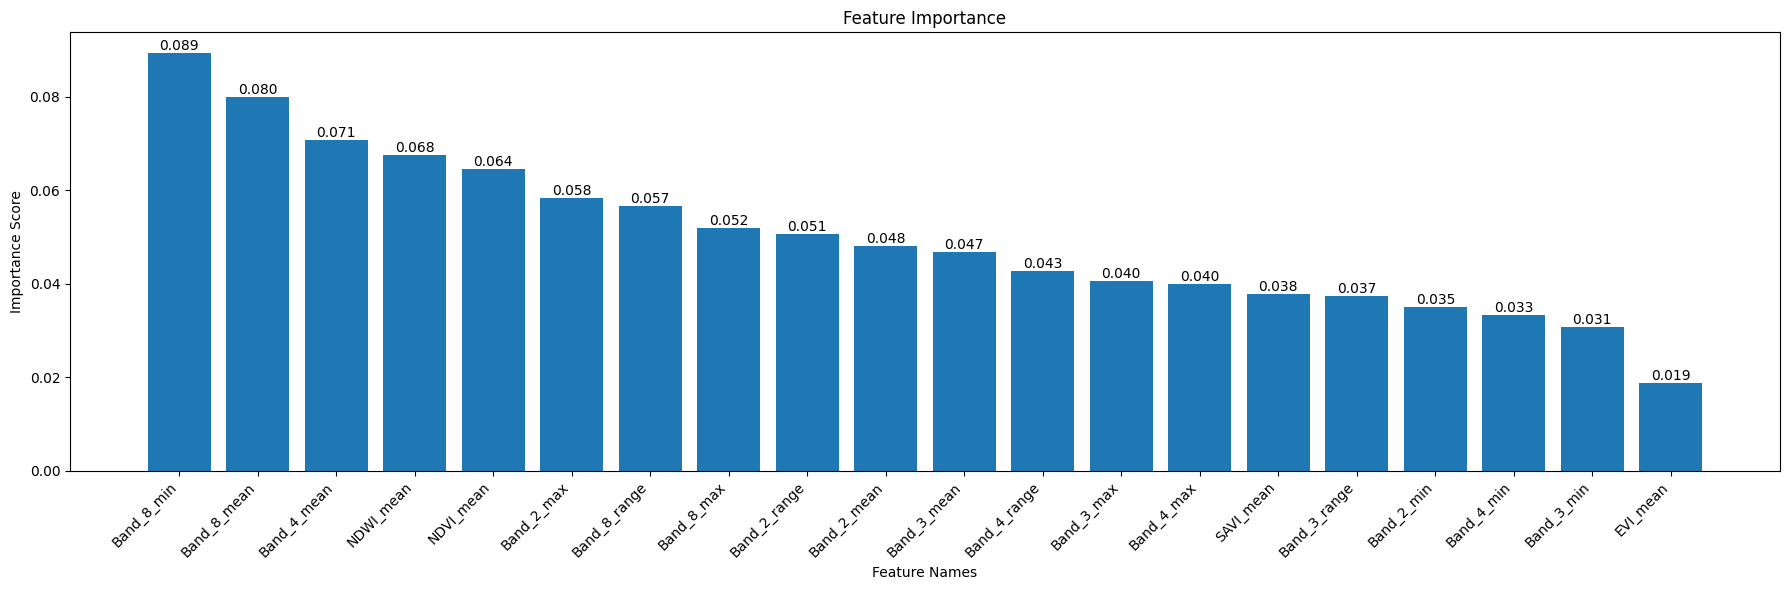

In [9]:
sorted_feature_importance = [(feature, importance) for feature, importance in sorted_feature_importance]

# Extract feature names and importance scores
feature_names = [feature for feature, _ in sorted_feature_importance]
importance_scores = [importance for _, importance in sorted_feature_importance]

# Create a bar plot of feature importance
plt.figure(figsize=(18, 6))
plt.bar(feature_names, importance_scores)
plt.xlabel('Feature Names')
plt.ylabel('Importance Score')
plt.title('Feature Importance')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the importance score on top of each bar
for i, v in enumerate(importance_scores):
    plt.text(i, v, f"{v:.3f}", ha='center', va='bottom')

plt.tight_layout()
plt.savefig('feature_importance_plot_Comb6.png', bbox_inches='tight')
plt.show()



### Accuracy Assessment

In [10]:
from sklearn.metrics import accuracy_score

accuracy_DF = accuracy_score(y_test, ypred_dt)
accuracy_percentage = accuracy_DF * 100  # Multiply by 100 to get a percentage

print(f"Accuracy of Random Forest Classifier is {accuracy_percentage:.2f}%")


Accuracy of Random Forest Classifier is 82.48%


### Confusion Matrix

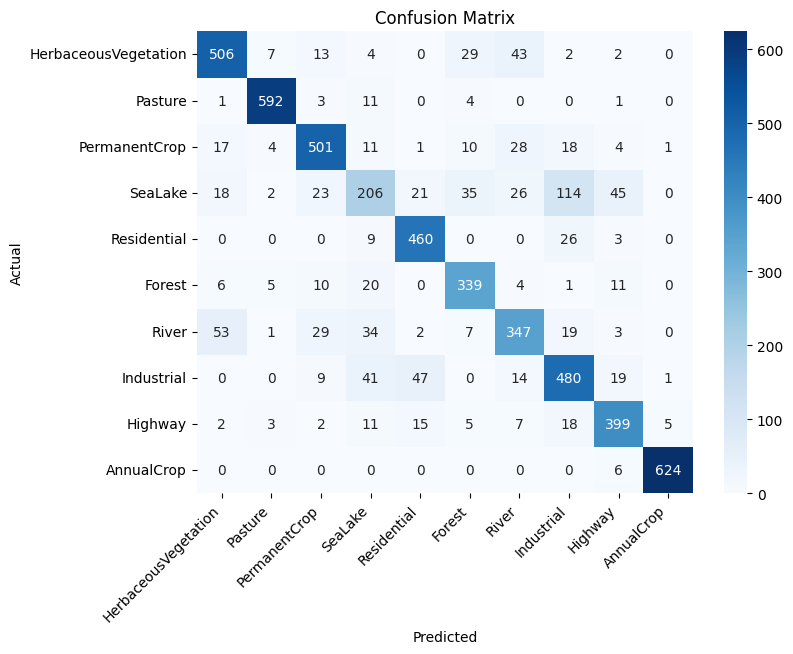

In [11]:
class_names = df_new['Class'].unique()  # Replace 'class_column' with your column name

# Creating the confusion matrix
conf_matrix = confusion_matrix(y_test, ypred_dt)

# Display the confusion matrix as a heatmap using seaborn
plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, ha='right')
plt.savefig('confusion_matrix_Comb6.png', bbox_inches='tight')
plt.show()

### Hyperparameter Optimization

In [12]:
import numpy as np

from time import time
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier

### Searching the best parameter combination

In [25]:

# Define the classifier
clf = RandomForestClassifier()

# Define the parameter distributions for RandomizedSearchCV
param_dist = {
    "max_depth": [10, None],
    "max_features": ['sqrt', 'log2'],
    "min_samples_split": sp_randint(2, 11),
    "bootstrap": [True, False],
    "criterion": ["gini", "entropy"]
}

# Perform randomized search
n_iter_search = 20
random_search = RandomizedSearchCV(clf, param_distributions=param_dist, n_iter=n_iter_search, cv=5)

start = time()
random_search.fit(X_train, y_train)
print("RandomizedSearchCV took %.2f seconds for %d candidates parameter settings." % ((time() - start), n_iter_search))

print("Best parameters found:")
print(random_search.best_params_)


RandomizedSearchCV took 1071.77 seconds for 20 candidates parameter settings.
Best parameters found:
{'bootstrap': False, 'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_split': 3}


### Training with the best parameter combination and its accuracy 

In [26]:
best_random = random_search.best_estimator_
best_random.fit(X_train, y_train)
pred_labels = best_random.predict(X_test)
accuracy = accuracy_score(y_test, pred_labels)  # Calculate accuracy score

# Convert accuracy to percentage
accuracy_percentage = accuracy * 100
print(f"Classification accuracy of RF (Random Search) is {accuracy_percentage:.2f}%")


Classification accuracy of RF (Random Search) is 83.00%
